In [1]:
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

# bilinear interpolation with PIL

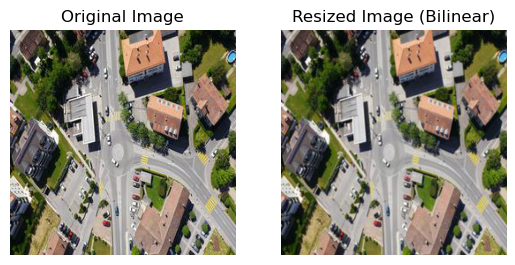

In [6]:
# Load the image
img = Image.open('1803.JPG')
img_array = np.array(img)

# Define the scale factor
scale_factor = 2

# Get the dimensions of the original image
original_height, original_width = img_array.shape[0:2]

# Calculate new dimensions
new_height = int(original_height * scale_factor)
new_width = int(original_width * scale_factor)

# Perform bilinear interpolation
resized_img_array = ndimage.zoom(img_array, (scale_factor, scale_factor, 1), order=1)

# Convert the numpy array back to an image
resized_img = Image.fromarray(resized_img_array.astype('uint8'))

# Save the result
resized_img.save('resized_image.jpg')

# Display the images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Resized Image (Bilinear)')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

# bilinear interpolation with opencv

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('path_to_your_image.jpg')

# Define the scale factor
scale_factor = 2

# Calculate new dimensions
new_width = int(img.shape[1] * scale_factor)
new_height = int(img.shape[0] * scale_factor)

# Resize the image using bilinear interpolation
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Convert BGR to RGB (OpenCV uses BGR by default)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Save the result
cv2.imwrite('resized_image.jpg', resized_img)

# Display the images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Resized Image (Bilinear)')
plt.imshow(resized_img_rgb)

plt.show()

# Bicubic interpolation 

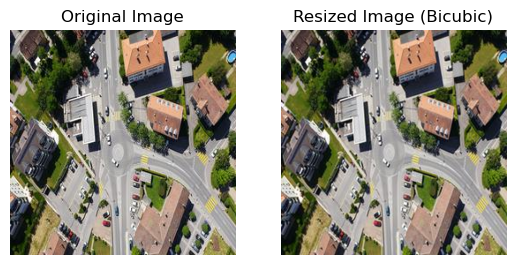

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('1803.JPG')

# Define the scale factor
scale_factor = 2

# Calculate new dimensions
new_width = int(img.shape[1] * scale_factor)
new_height = int(img.shape[0] * scale_factor)

# Resize the image using bicubic interpolation
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

# Convert BGR to RGB (OpenCV uses BGR by default)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Save the result
cv2.imwrite('resized_image_bicubic.jpg', resized_img)

# Display the images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Resized Image (Bicubic)')
plt.imshow(resized_img_rgb)
plt.axis('off')
plt.show()

# Spline interpolation 

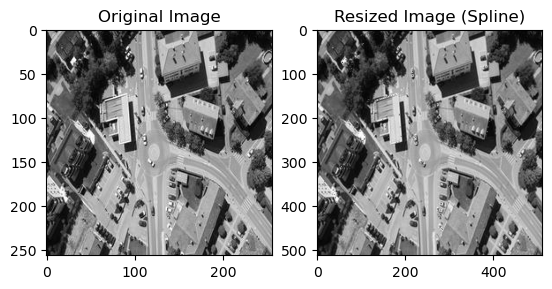

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
img = Image.open('1803.JPG').convert('L')  # Convert to grayscale
img_array = np.array(img)

# Get original dimensions
original_height, original_width = img_array.shape

# Create new coordinate grid
scale_factor = 2
new_height = int(original_height * scale_factor)
new_width = int(original_width * scale_factor)

# Create a grid for the new image
x_new = np.linspace(0, original_width - 1, new_width)
y_new = np.linspace(0, original_height - 1, new_height)

# Interpolation function for rows
def interpolate_row(row):
    cs = CubicSpline(np.arange(original_width), row)
    return cs(x_new)

# Apply cubic spline interpolation to each row
img_array_resized = np.array([interpolate_row(row) for row in img_array])

# Apply cubic spline interpolation to each column (on the transposed array)
img_array_resized = np.array([interpolate_row(col) for col in img_array_resized.T]).T

# Convert the numpy array back to an image
resized_img = Image.fromarray(np.uint8(img_array_resized))

# Save and display the result
resized_img.save('resized_image_spline.jpg')

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Resized Image (Spline)')
plt.imshow(resized_img, cmap='gray')


# fourier 

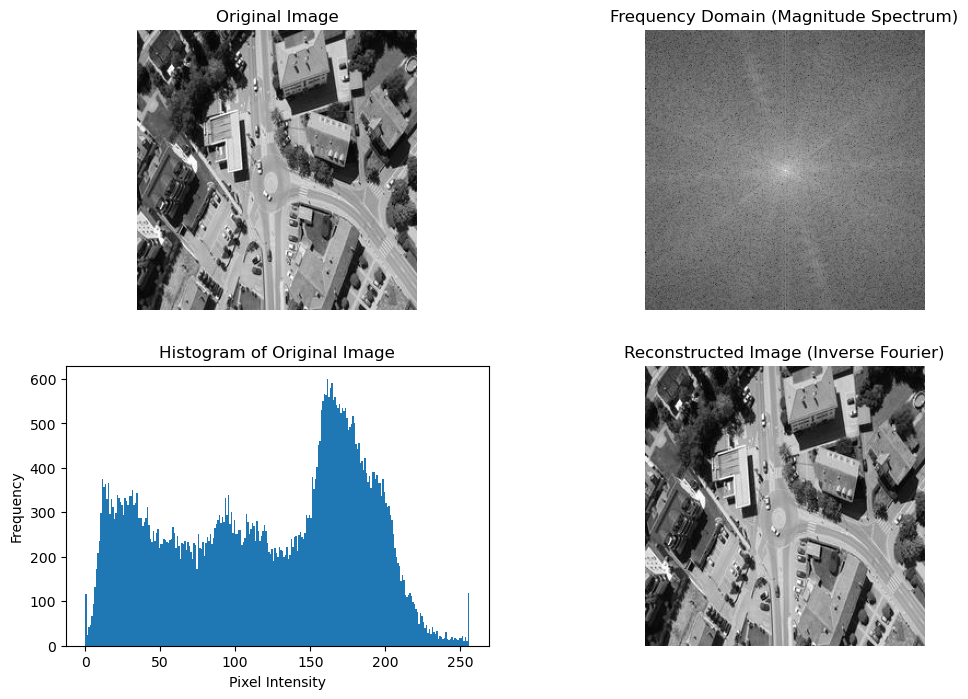

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('1803.JPG', cv2.IMREAD_GRAYSCALE)

# Plot the original image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Compute the 2D Fourier Transform of the image
dft = np.fft.fft2(np.float32(img))
dft_shift = np.fft.fftshift(dft)

# Magnitude Spectrum (Log scale for better visualization)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# Plot the frequency domain (magnitude spectrum)
plt.subplot(2, 2, 2)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Plot the histogram of the original image
plt.subplot(2, 2, 3)
plt.title('Histogram of Original Image')
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Apply the inverse Fourier Transform
dft_ishift = np.fft.ifftshift(dft_shift)
img_back = np.fft.ifft2(dft_ishift)
img_back = np.abs(img_back)

# Plot the reconstructed image after inverse Fourier Transform
plt.subplot(2, 2, 4)
plt.title('Reconstructed Image (Inverse Fourier)')
plt.imshow(img_back, cmap='gray')
plt.axis('off')

plt.show()

# Fourier with zero padding to enhance the resolution 


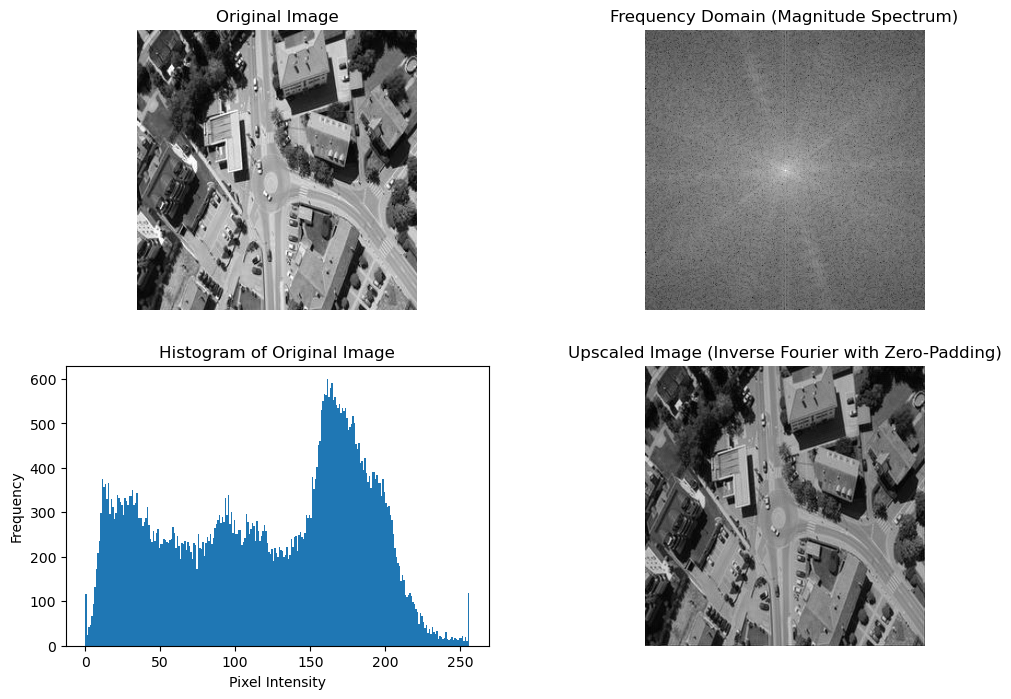

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('1803.JPG', cv2.IMREAD_GRAYSCALE)

# Plot the original image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Compute the 2D Fourier Transform of the image
dft = np.fft.fft2(np.float32(img))
dft_shift = np.fft.fftshift(dft)

# Magnitude Spectrum (Log scale for better visualization)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# Plot the frequency domain (magnitude spectrum)
plt.subplot(2, 2, 2)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Zero-padding to increase the size (enhancing resolution)
rows, cols = img.shape
pad_factor = 2  # Increase resolution by a factor of 2
new_rows = rows * pad_factor
new_cols = cols * pad_factor

# Create a new zero-padded DFT
dft_padded = np.zeros((new_rows, new_cols), dtype=np.complex64)
dft_padded[int(new_rows/4):int(3*new_rows/4), int(new_cols/4):int(3*new_cols/4)] = dft_shift

# Shift back and apply the inverse Fourier Transform
dft_padded_shifted = np.fft.ifftshift(dft_padded)
img_upscaled = np.fft.ifft2(dft_padded_shifted)
img_upscaled = np.abs(img_upscaled)

# Normalize the image for display
img_upscaled = np.uint8(cv2.normalize(img_upscaled, None, 0, 255, cv2.NORM_MINMAX))

# Plot the histogram of the original image
plt.subplot(2, 2, 3)
plt.title('Histogram of Original Image')
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot the reconstructed image after inverse Fourier Transform (with enhanced resolution)
plt.subplot(2, 2, 4)
plt.title('Upscaled Image (Inverse Fourier with Zero-Padding)')
plt.imshow(img_upscaled, cmap='gray')
plt.axis('off')

plt.show()

# wavelet 

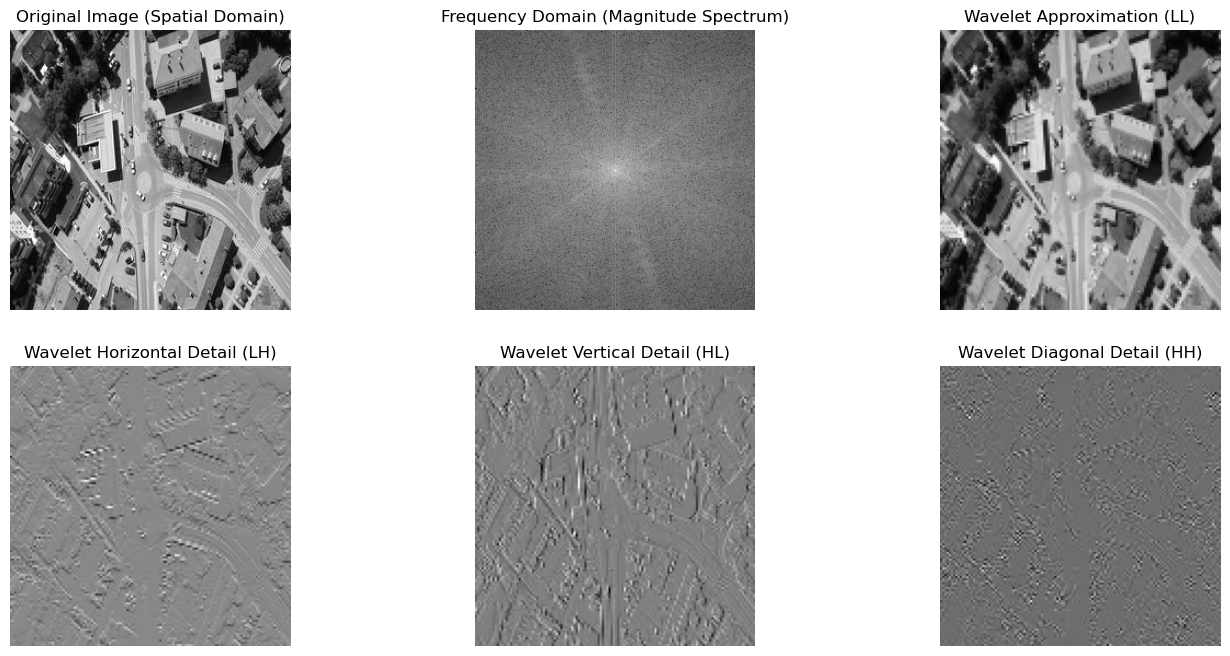

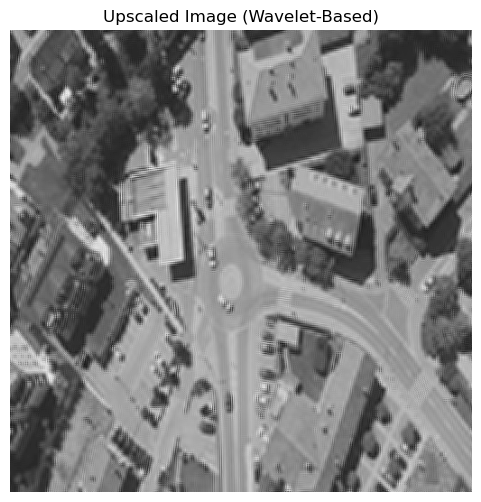

In [17]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('1803.JPG', cv2.IMREAD_GRAYSCALE)

# Perform 2D Discrete Wavelet Transform (DWT)
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Compute the 2D Fourier Transform of the image
dft = np.fft.fft2(np.float32(img))
dft_shift = np.fft.fftshift(dft)

# Magnitude Spectrum (Log scale for better visualization)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# Plot the spatial and frequency domain information
plt.figure(figsize=(18, 8))
# Adjust the space between plots
plt.subplots_adjust(wspace=0.00000000055, hspace=0.2)

# Original Image (Spatial Domain)
plt.subplot(2, 3, 1)
plt.title('Original Image (Spatial Domain)')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Frequency Domain (Magnitude Spectrum)
plt.subplot(2, 3, 2)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Wavelet Decomposition
plt.subplot(2, 3, 3)
plt.title('Wavelet Approximation (LL)')
plt.imshow(LL, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Wavelet Horizontal Detail (LH)')
plt.imshow(LH, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Wavelet Vertical Detail (HL)')
plt.imshow(HL, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Wavelet Diagonal Detail (HH)')
plt.imshow(HH, cmap='gray')
plt.axis('off')

plt.show()

# Super-resolution: Upscale the approximation and synthesize missing details (simple approach)
LL_resized = cv2.resize(LL, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
LH_resized = cv2.resize(LH, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
HL_resized = cv2.resize(HL, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
HH_resized = cv2.resize(HH, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

# Reconstruct the high-resolution image using Inverse DWT
img_upscaled = pywt.idwt2((LL_resized, (LH_resized, HL_resized, HH_resized)), 'haar')

# Normalize and convert to uint8 for display
img_upscaled = np.uint8(cv2.normalize(img_upscaled, None, 0, 255, cv2.NORM_MINMAX))

# Display the upscaled image
plt.figure(figsize=(6, 6))
plt.title('Upscaled Image (Wavelet-Based)')
plt.imshow(img_upscaled, cmap='gray')
plt.axis('off')
plt.show()

# neighbour embedding 

In [2]:
import numpy as np
import cv2
from sklearn.neighbors import NearestNeighbors
import os

def load_images_from_folder(folder):
    """
    Load images from a specified folder.
    
    :param folder: Path to the folder containing images.
    :return: List of images loaded as numpy arrays.
    """
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def extract_patches(image, patch_size, stride):
    """
    Extracts overlapping patches from the input image.
    
    :param image: Input image (2D).
    :param patch_size: Size of each patch (tuple).
    :param stride: Stride between patches.
    :return: Array of patches.
    """
    patches = []
    for y in range(0, image.shape[0] - patch_size[0] + 1, stride):
        for x in range(0, image.shape[1] - patch_size[1] + 1, stride):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patches.append(patch.flatten())
    return np.array(patches)

def build_hr_patch_database(hr_images, patch_size, stride):
    """
    Build a database of high-resolution patches from the HR images.
    
    :param hr_images: List of high-resolution images.
    :param patch_size: Size of each patch.
    :param stride: Stride between patches.
    :return: Array of high-resolution patches.
    """
    hr_patches = []
    for hr_image in hr_images:
        patches = extract_patches(hr_image, patch_size, stride)
        hr_patches.append(patches)
    return np.vstack(hr_patches)

def reconstruct_image(patches, image_size, patch_size, stride):
    """
    Reconstructs the image from patches.
    
    :param patches: Array of patches.
    :param image_size: Size of the output image.
    :param patch_size: Size of each patch.
    :param stride: Stride between patches.
    :return: Reconstructed image.
    """
    image = np.zeros(image_size)
    weight = np.zeros(image_size)
    patch_idx = 0
    for y in range(0, image_size[0] - patch_size[0] + 1, stride):
        for x in range(0, image_size[1] - patch_size[1] + 1, stride):
            patch = patches[patch_idx].reshape(patch_size)
            image[y:y + patch_size[0], x:x + patch_size[1]] += patch
            weight[y:y + patch_size[0], x:x + patch_size[1]] += 1
            patch_idx += 1
    return image / weight

def neighbor_embedding_sr(lr_image, hr_patches, k=5, patch_size=(5, 5), stride=1):
    """
    Perform Neighbor Embedding Super-Resolution on the given low-resolution image.
    
    :param lr_image: Low-resolution input image.
    :param hr_patches: Array of high-resolution patches from training data.
    :param k: Number of nearest neighbors.
    :param patch_size: Size of each patch.
    :param stride: Stride for patch extraction.
    :return: Super-resolved high-resolution image.
    """
    lr_patches = extract_patches(lr_image, patch_size, stride)
    
    # Find K nearest neighbors using Euclidean distance
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(hr_patches)
    distances, indices = nbrs.kneighbors(lr_patches)
    
    # Reconstruct HR patches by weighted sum of nearest neighbors
    hr_reconstructed_patches = np.zeros_like(lr_patches)
    for i in range(lr_patches.shape[0]):
        weights = np.exp(-distances[i]**2 / (2 * np.var(distances[i])))
        weights /= np.sum(weights)
        hr_reconstructed_patches[i] = np.dot(weights, hr_patches[indices[i]])
    
    # Reconstruct the high-resolution image from patches
    hr_image_size = (lr_image.shape[0] * 2, lr_image.shape[1] * 2)  # Assuming 2x upscaling
    hr_image = reconstruct_image(hr_reconstructed_patches, hr_image_size, patch_size, stride)
    
    return hr_image

# Example Usage
# Define paths to your HR and LR image folders
hr_image_folder =  'D:/thesis/codes/hr_train_LR'
lr_image_folder =  'D:/thesis/codes/lr6464'

# Load HR and LR images
hr_images = load_images_from_folder(hr_image_folder)
lr_images = load_images_from_folder(lr_image_folder)

# Parameters
patch_size = (5, 5)
stride = 1
k = 5

# Build the HR patch database from the training HR images
hr_patches = build_hr_patch_database(hr_images, patch_size, stride)

# Super-resolve each LR image
for i, lr_image in enumerate(lr_images):
    sr_image = neighbor_embedding_sr(lr_image, hr_patches, k=k, patch_size=patch_size, stride=stride)
    cv2.imwrite(f'super_resolved_image_{i}.png', sr_image)

print("Super-resolution complete. Check the output images.")

C:\Users\Amir\AppData\Local\Temp\ipykernel_2724\1440779799.py:93: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights)
C:\Users\Amir\AppData\Local\Temp\ipykernel_2724\1440779799.py:94: RuntimeWarning: invalid value encountered in cast
  hr_reconstructed_patches[i] = np.dot(weights, hr_patches[indices[i]])


IndexError: index 3600 is out of bounds for axis 0 with size 3600

# Sparse representation 

In [ ]:
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import DictionaryLearning
from skimage import io, img_as_float32

# Load some example high-resolution images (training data)
hr_images = [img_as_float32(io.imread(f'D:/thesis/codes/hr_train_LR/IX-11-98611_0215_0650.JPG', as_gray=True)) for i in range(1, 6)]

# Generate low-resolution images by downsampling
lr_images = [img[::2, ::2] for img in hr_images]

# Extract patches from both low-resolution and high-resolution images
patch_size = (8, 8)
lr_patches = np.concatenate([extract_patches_2d(img, patch_size) for img in lr_images], axis=0)
hr_patches = np.concatenate([extract_patches_2d(img, patch_size) for img in hr_images], axis=0)

# Reshape patches to be a 2D array (each row is a patch)
lr_patches_reshaped = lr_patches.reshape(lr_patches.shape[0], -1)
hr_patches_reshaped = hr_patches.reshape(hr_patches.shape[0], -1)

# Learn dictionaries for low-resolution and high-resolution patches
n_components = 100  # Number of dictionary atoms
dl_model = DictionaryLearning(n_components=n_components, transform_algorithm='lasso_lars', transform_alpha=0.1)

Dl = dl_model.fit(lr_patches_reshaped).components_
Dh = dl_model.fit(hr_patches_reshaped).components_

# Save the dictionaries
np.save('Dl.npy', Dl)
np.save('Dh.npy', Dh)

In [1]:
import numpy as np
from sklearn.decomposition import SparseCoder
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from skimage import io, img_as_float32

# Example low-resolution and high-resolution dictionaries (pre-learned)
Dl = np.load('Dl.npy')  # Low-resolution dictionary
Dh = np.load('Dh.npy')  # High-resolution dictionary

def sparse_coding(y, Dl, Dh):
    coder = SparseCoder(dictionary=Dl.T, transform_n_nonzero_coefs=None, transform_alpha=0.1, transform_algorithm='lasso_lars')
    alpha = coder.transform(y)
    x = np.dot(alpha, Dh.T)
    return x

# Load a low-resolution image (for example purposes)
lr_image = img_as_float32(io.imread('D:/thesis/codes/lr6464/IX-11-98611_0215_0650.JPG', as_gray=True))

# Extract patches from the low-resolution image
patches_lr = extract_patches_2d(lr_image, (8, 8))

# Reshape patches to match the dictionary dimension
patches_lr_reshaped = patches_lr.reshape(patches_lr.shape[0], -1)

# Reconstruct high-resolution patches
patches_hr = []
for patch in patches_lr_reshaped:
    patch_hr = sparse_coding(patch.reshape(1, -1), Dl, Dh)
    patches_hr.append(patch_hr)

patches_hr = np.array(patches_hr).reshape(patches_lr.shape)

# Reconstruct the high-resolution image from patches
hr_image = reconstruct_from_patches_2d(patches_hr, lr_image.shape)

# Save or display the high-resolution image
io.imsave('high_res_image.png', hr_image)

FileNotFoundError: [Errno 2] No such file or directory: 'Dl.npy'